<a href="https://colab.research.google.com/github/vatsal-g/First-sem-project-/blob/main/Package_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import library

In [7]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import the data

In [9]:
df = pd.read_csv("/content/placement (1).csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


#Data analysis

In [10]:
#data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [11]:
#find the null value
df.isnull().sum()

,0
cgpa,0
package,0


In [12]:
#how does the data looklike mathematically
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [13]:
#find the number of rows and column
df.shape

(200, 2)

#Data visualization

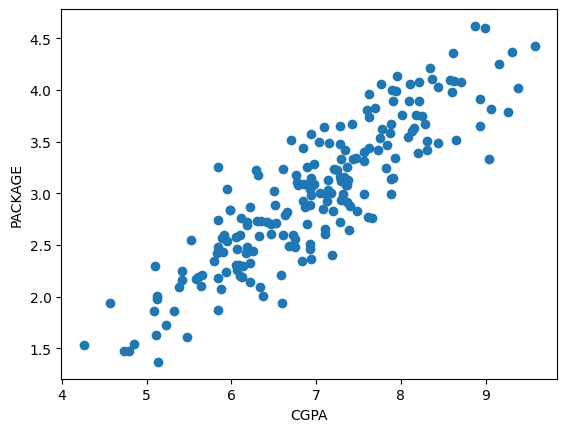

In [14]:
#plot the data
plt.scatter(df["cgpa"], df["package"])
plt.xlabel("CGPA")
plt.ylabel("PACKAGE")
plt.show()

#Independent and dependent feature

In [15]:
#find the independent and dependent feature
x = df.iloc[:, 0]  #independent feature
y = df.iloc[:, 1] #dependent feature
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [16]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


#split the data into train and test

In [17]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                          test_size = 0.2, random_state = 42)
x_train

,cgpa
79,7.18
197,7.21
38,8.62
24,6.53
122,5.12
...,...
106,6.13
14,7.73
92,7.90
179,7.14


#Import and train the model

In [18]:
#import the model and training
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

#coefficient and intercept

In [20]:
m = model.coef_
c = model.intercept_
print(m, c)

[0.57425647] -1.0270069374542108


#Find the package

In [21]:
cgpa = 9.5
package = m*cgpa +c
print(package)

[4.42842955]


#prediction the model

In [22]:
#prediction the model
y_pred = model.predict(x_test.values.reshape(-1, 1))
y_pred, y_test

(array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
        3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
        1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
        3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
        2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
        2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
        3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
        3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298]),
 95     2.79
 15     3.23
 30     3.26
 158    3.04
 128    3.34
 115    4.21
 69     2.94
 170    2.87
 174    2.99
 45     3.58
 66     1.63
 182    2.08
 165    4.08
 78     2.21
 186    3.47
 177    3.64
 56     2.74
 152    3.08
 82     2.17
 68     2.99
 124    2.31
 16     2.35
 148    3.40
 93     3.08
 65     3.81
 60     2.19
 84     1.53
 67     2.89
 125    3.16
 132    2.48
 9      3.51
 18     2.98
 55     3.39
 75     3.28
 150    2.73

In [23]:
import seaborn as sns

#Create best fit line

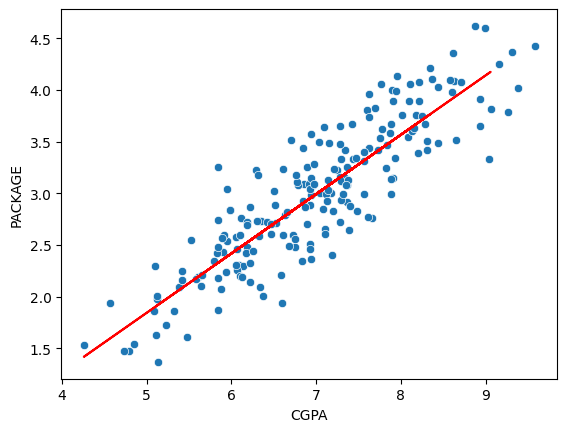

In [24]:
sns.scatterplot(x = df["cgpa"], y = df["package"])
plt.plot(x_test, y_pred, color = "red")
plt.xlabel("CGPA")
plt.ylabel("PACKAGE")
plt.show()

#Performance of the model

In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7730984312051673


#Error of the model

In [26]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.08417638361329656
